<a href="https://colab.research.google.com/github/shoiTK/deep_learning_with_pytorch/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

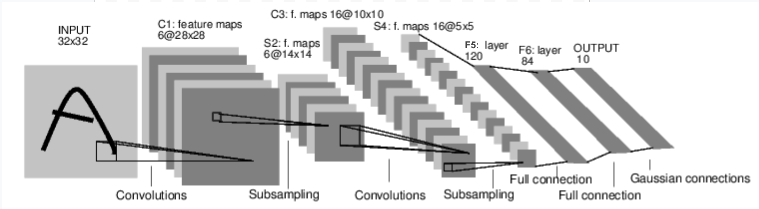

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #サンプル数、チャンネル数、フィルタサイズ（3x3）
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = Net()
print(net)
  


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [6]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0786, -0.1027,  0.1086, -0.0870, -0.0805,  0.0501,  0.0749,  0.0039,
         -0.0295,  0.1241]], grad_fn=<AddmmBackward>)


In [7]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [9]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0461, grad_fn=<MseLossBackward>)


In [16]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])

In [17]:
net.zero_grad()

print('conv1.bias.grad before backward:')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward:')
print(net.conv1.bias.grad)

conv1.bias.grad before backward:
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward:
tensor([-0.0009,  0.0100, -0.0018,  0.0055, -0.0076, -0.0137])


In [18]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()